# In Class Regression Example 1: MORE Cars


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from patsy import dmatrices
import seaborn as sns
from IPython.display import Image



In [29]:
cars= sm.datasets.get_rdataset('mtcars').data

# The Plan:

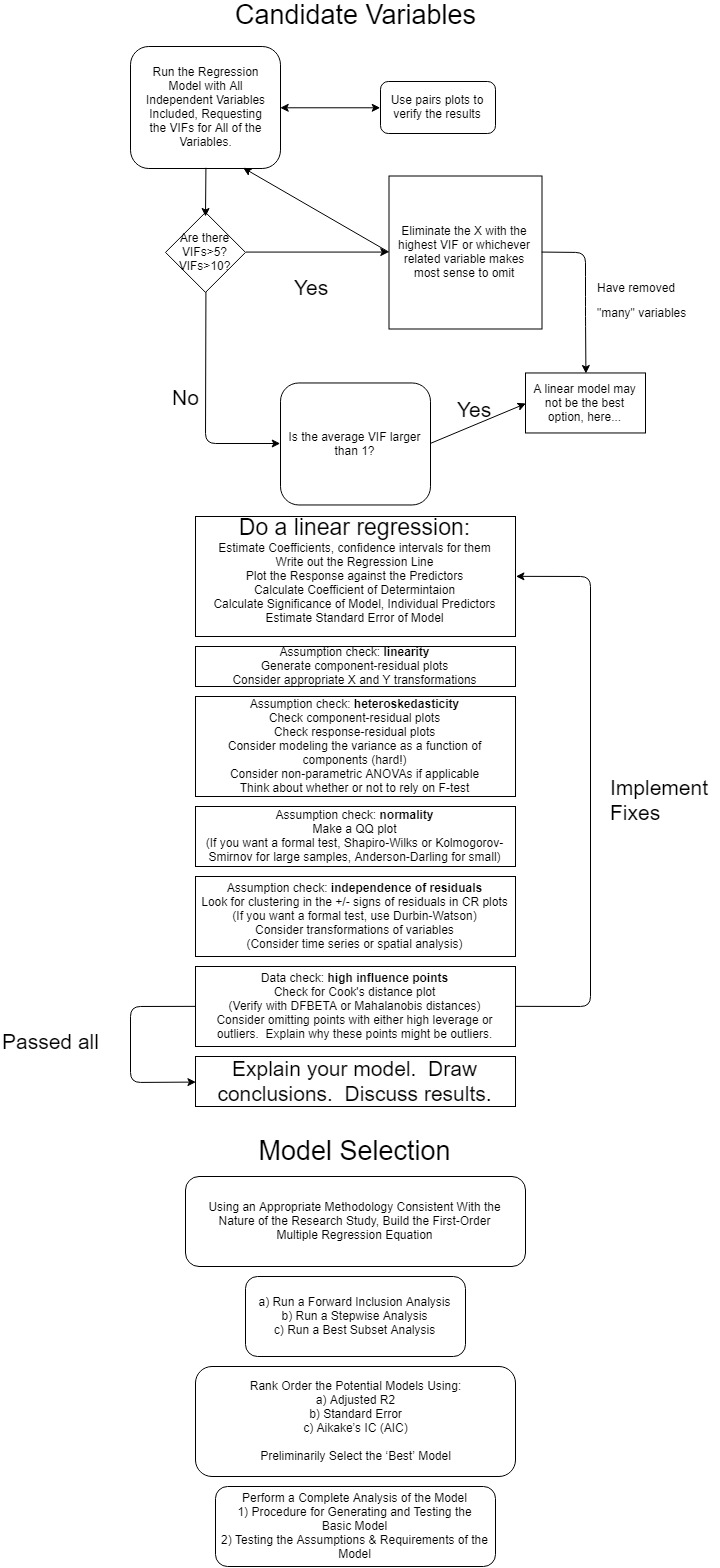

In [3]:
Image(filename = "MLRFLow.JPG", width=800, height=1600)


# Part 1: Visualizations and Colinearity:

What do we see?

A data frame with 32 observations on 11 (numeric) variables.

- mpg	Miles/(US) gallon
- cyl	Number of cylinders
- disp	Displacement (cu.in.)
- hp	Gross horsepower
- drat	Rear axle ratio
- wt	Weight (1000 lbs)
- qsec	1/4 mile time
- vs	Engine (0 = V-shaped, 1 = straight)
- am	Transmission (0 = automatic, 1 = manual)
- gear	Number of forward gears
- carb	Number of carburetors

**GOAL:** predict the milage of a car given its other descriptors/features.

                    mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
Mazda RX4          21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag      21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
Datsun 710         22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive     21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

                   carb  
Mazda RX4             4  
Mazda RX4 Wag         4  
Datsun 710            1  
Hornet 4 Drive        1  
Hornet Sportabout     2  


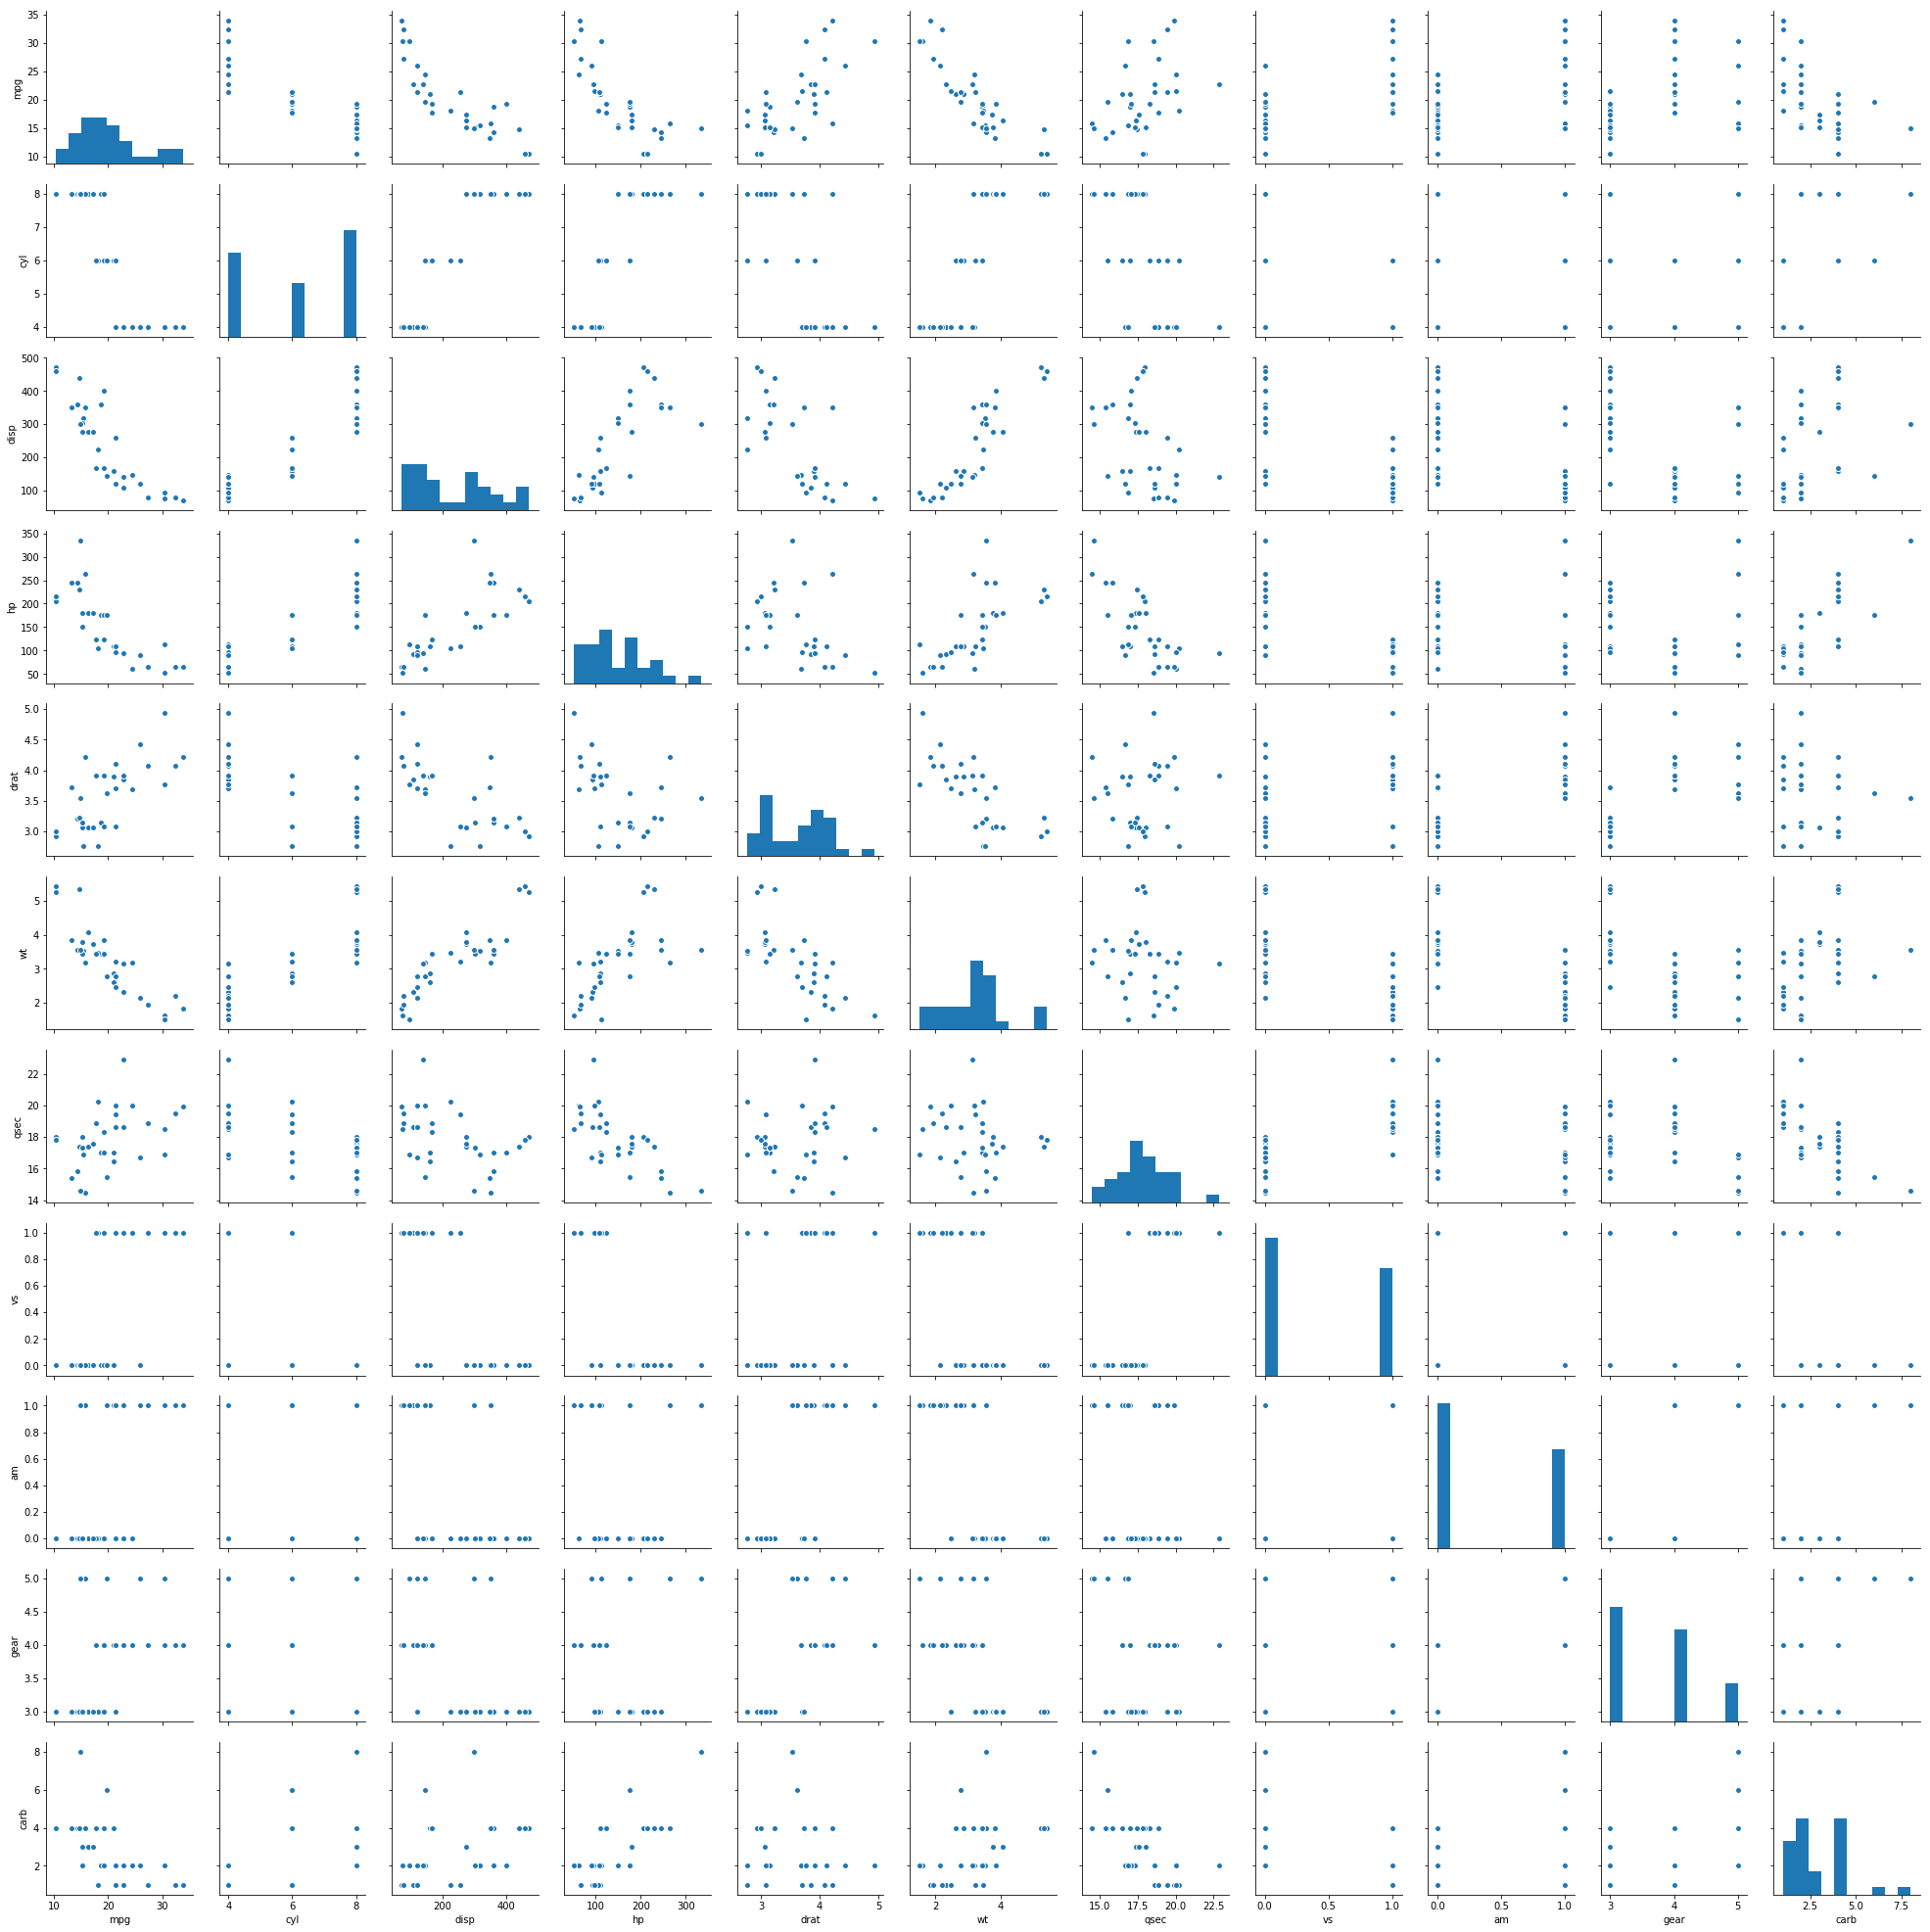

In [4]:

print(cars.head())
sns.pairplot(cars)


Two big intuitions:

1. Since this is only 32 observations and 11 columns, we probably want to cut one to avoid overfitting.  Having nearly 1/3 as many features as you have observations is pretty high!  A lean model might want at most 5?
2. At a glance, many feature are related.  See e.g. row/column 2: cylinder seems somewhat related to all of the other features.  We see numerous other similarities: weight to horsepower, etc.

We definitely want to remove some things.  Here's what a "full" model would look like:

In [5]:
y, X = dmatrices('mpg ~ cyl+disp+hp+drat+wt+qsec+vs+am+gear+carb', data=cars, return_type='dataframe')
carslm=sm.OLS(y,X).fit()
print(carslm.summary())



                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     13.93
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           3.79e-07
Time:                        16:06:45   Log-Likelihood:                -69.855
No. Observations:                  32   AIC:                             161.7
Df Residuals:                      21   BIC:                             177.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3034     18.718      0.657      0.5


There are two places that the colinarity shows up above.  First, note the warning number [2] at the bottom.  The condition number is a numeric property of the matrix $X^TX$ that serves to measure its linear dependence: and how easy it is to invert, numerically!  High is very bad here.  Second, notice how *despite* a high-sh $R^2$ and $F$ significance, none of the individual columns look useful.  That's a sign that their redundancy is making them confuse one another.

The classic score for *which* variables to remove first is the **variance inflation factor**.  For each predictor, it measures the multiple by which our overall uncertainties are changing because of the presence of that predictor.


In [6]:
for i in range(X.shape[1]):
    print('VIF for ', X.columns[i], ' ', variance_inflation_factor(X.values, i))

VIF for  Intercept   1596.273030003005
VIF for  cyl   15.373833403442195
VIF for  disp   21.620241028958883
VIF for  hp   9.832036844359045
VIF for  drat   3.374620008314746
VIF for  wt   15.164886963987044
VIF for  qsec   7.527958225291088
VIF for  vs   4.965873466484718
VIF for  am   4.648487455500158
VIF for  gear   5.357452105940663
VIF for  carb   7.908746751184423


## Step 1b: remove largest offending predictor, repeat.

In [30]:
#removed cyl
y, X = dmatrices('mpg ~ disp+hp+drat+wt+qsec+vs+am+gear+carb', data=cars, return_type='dataframe')
carslm=sm.OLS(y,X).fit()

for i in range(X.shape[1]):
    print('VIF for ', X.columns[i], ' ', variance_inflation_factor(X.values, i))

VIF for  Intercept   873.3271001749887
VIF for  disp   20.088643356025095
VIF for  hp   9.499794893207913
VIF for  drat   3.1180615104098077
VIF for  wt   14.971794852674131
VIF for  qsec   6.960353471994583
VIF for  vs   4.45493451266784
VIF for  am   4.3322859301469485
VIF for  gear   4.6915358660418525
VIF for  carb   7.497053711773197


## Step 1c: remove largest offending predictor, repeat.

In [8]:
#removed disp
y, X = dmatrices('mpg ~ hp+drat+wt+qsec+vs+am+gear+carb', data=cars, return_type='dataframe')
carslm=sm.OLS(y,X).fit()

for i in range(X.shape[1]):
    print('VIF for ', X.columns[i], ' ', variance_inflation_factor(X.values, i))

VIF for  Intercept   806.7890896073458
VIF for  hp   6.01578768772228
VIF for  drat   3.1115007731208184
VIF for  wt   6.051126642065609
VIF for  qsec   5.918682153800615
VIF for  vs   4.270956073363669
VIF for  am   4.285814561431884
VIF for  gear   4.690187138988732
VIF for  carb   4.290467706546452


In [9]:

#removed wt
y, X = dmatrices('mpg ~ hp+drat+qsec+vs+am+gear+carb', data=cars, return_type='dataframe')
carslm=sm.OLS(y,X).fit()

for i in range(X.shape[1]):
    print('VIF for ', X.columns[i], ' ', variance_inflation_factor(X.values, i))

VIF for  Intercept   806.5099706540606
VIF for  hp   5.075010831402604
VIF for  drat   3.0209339839480065
VIF for  qsec   4.713680876219019
VIF for  vs   3.791802532941592
VIF for  am   4.052249311043497
VIF for  gear   4.372869292906331
VIF for  carb   3.641534260560515


In [10]:

#removed hp
y, X = dmatrices('mpg ~ drat+qsec+vs+am+gear+carb', data=cars, return_type='dataframe')
carslm=sm.OLS(y,X).fit()
print(carslm.summary())

for i in range(X.shape[1]):
    print('VIF for ', X.columns[i], ' ', variance_inflation_factor(X.values, i))

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     18.64
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           3.99e-08
Time:                        16:06:45   Log-Likelihood:                -75.178
No. Observations:                  32   AIC:                             164.4
Df Residuals:                      25   BIC:                             174.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5965     11.520      0.052      0.9

Well, we're down to 6 features and VIFs are still somewhat high on average.  The model is doing a bit better, although we've actually lose a little adjusted $R^2$.  That's probably OK!  Let's inspect our model.

# Part 2: Assumption Checks

## 2a: Normality:

Two plots here: a histogram for visually assessing normality ("is is bell-like?") and a QQplot:("are the quantiles normal-like?")

(array([3., 0., 2., 1., 6., 4., 7., 5., 2., 2.]),
 array([-6.08578727, -5.00447231, -3.92315735, -2.84184239, -1.76052744,
        -0.67921248,  0.40210248,  1.48341744,  2.5647324 ,  3.64604736,
         4.72736232]),
 <a list of 10 Patch objects>)

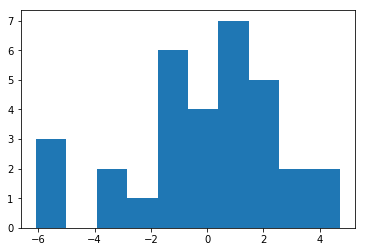

In [11]:
plt.hist(carslm.resid)


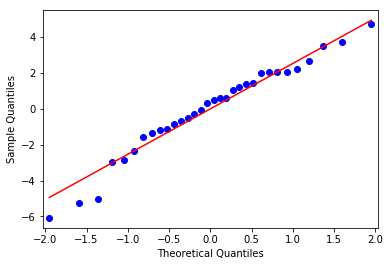

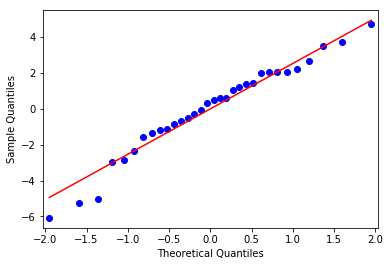

In [12]:
sm.qqplot(carslm.resid, stats.t, distargs=(len(y)-2,), line='s')

### Normality Results:

How do we feel?  Statisticians are notoriously lazy about this.  There exist some formal hypothesis tests (null: it's normal, alternative: it's really not), but often we just look to get an understanding of what might be causing issues.  If a few points are way off, they end up as extreme negative/positive residuals, and extreme outcomes are supposed to be very rare with normals.  So if we see big misses on 31 data points, they show up on our QQ plot as points way-off-the-line.

It's a sign to be careful about outliers, maybe.  All-in-all this looks pretty good, except maybe that big -6 outlier point!

Under this section titled normality is also a nice spot to do a quick outlier check.

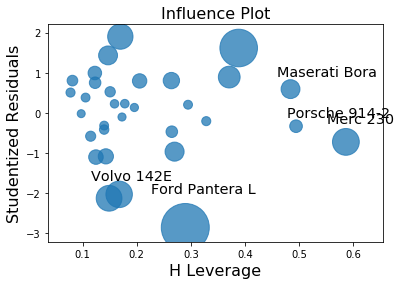

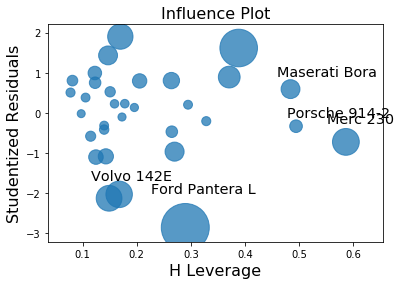

In [13]:
sm.graphics.influence_plot(carslm, criterion="cooks")


A few cars are high leverage: some of the higher end ones like the Maserati, Porsche, Mercedes are pretty high leverage.  The large error looks like it's the Ford Pantera (the y-axis of that plot is a version of normalized residuals).  That might be a good point to keep an eye one if we wanted to omit one from our model.

## 2b: Residuals, Model Goodness:

Two major plots here:
- y against the fitted values for an overall view of goodness of fit
- FOR EACH PREDICTOR x: x against residuals.  Looking for patterns in the residuals: +/- clumping (non-independence) but also fanning out (heteroskedasticity).

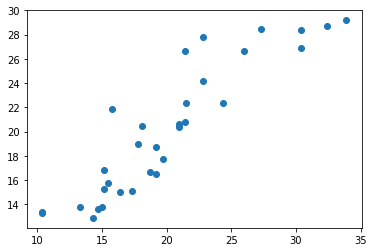

In [14]:
plt.scatter(cars['mpg'], carslm.fittedvalues)

Our fit isn't too bad!  But it does look like it might be concave down: those larger $y$ values look like a bit of an issue.  Lets look at whether one or more $X$ values might let us capture those fits.

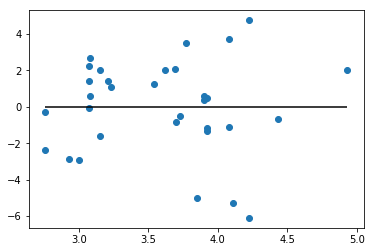

In [15]:
#reminder of modeL: 'mpg ~ drat+qsec+vs+am+gear+carb'
plt.scatter(cars['drat'], carslm.resid)
plt.hlines(0, xmin=min(cars['drat']), xmax=max(cars['drat']))
#Looks ok.  Maybe fanning out, though?

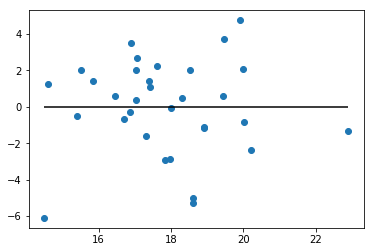

In [16]:
#reminder of modeL: 'mpg ~ drat+qsec+vs+am+gear+carb'
plt.scatter(cars['qsec'], carslm.resid)
plt.hlines(0, xmin=min(cars['qsec']), xmax=max(cars['qsec']))
# looks great!  You can see our big outlier here: it's a big miss on one of the slowest cars!

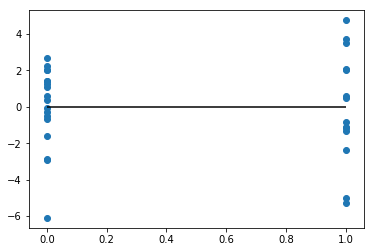

In [17]:
#reminder of modeL: 'mpg ~ drat+qsec+vs+am+gear+carb'
plt.scatter(cars['vs'], carslm.resid)
plt.hlines(0, xmin=min(cars['vs']), xmax=max(cars['vs']))
#always hard to see this on categoricals.  Could do box plots, but honestly this is probably fine.

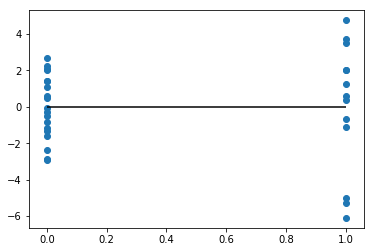

In [18]:
#reminder of modeL: 'mpg ~ drat+qsec+vs+am+gear+carb'
plt.scatter(cars['am'], carslm.resid)
plt.hlines(0, xmin=min(cars['am']), xmax=max(cars['am']))
#definiitely higher spread and variance on am=1.  We could test this and report:
#the manual transmission cars have higher spread in mileage.

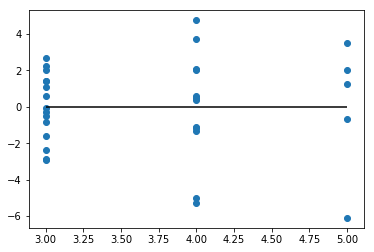

In [19]:
#reminder of modeL: 'mpg ~ drat+qsec+vs+am+gear+carb'
plt.scatter(cars['gear'], carslm.resid)
plt.hlines(0, xmin=min(cars['gear']), xmax=max(cars['gear']))
#We could work with this!

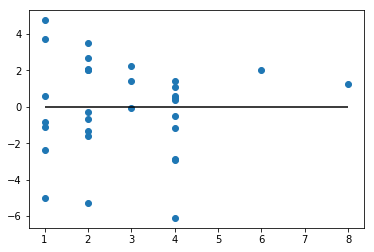

In [20]:
#reminder of modeL: 'mpg ~ drat+qsec+vs+am+gear+carb'
plt.scatter(cars['carb'], carslm.resid)
plt.hlines(0, xmin=min(cars['carb']), xmax=max(cars['carb']))
#We could work with this!

Let's try adding in Carb squared, since that's one of the two candidates for improvement.


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     18.64
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           3.99e-08
Time:                        16:06:47   Log-Likelihood:                -75.178
No. Observations:                  32   AIC:                             164.4
Df Residuals:                      25   BIC:                             174.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5965     11.520      0.052      0.9

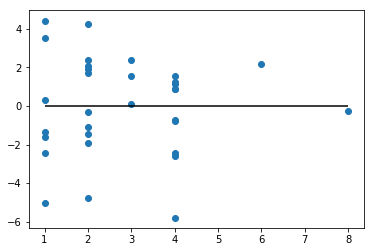

In [21]:

cars['carbsq']=cars['carb']**2

#straight to the payoffs: better fit and/or better residuals for that variable?
#old model for comparison:
print(carslm.summary())


y, X = dmatrices('mpg ~ drat+qsec+vs+am+gear+carb+carbsq', data=cars, return_type='dataframe')
carslm2=sm.OLS(y,X).fit()
print(carslm2.summary())
#reminder of modeL: 'mpg ~ drat+qsec+vs+am+gear+carb'
plt.scatter(cars['carb'], carslm2.resid)
plt.hlines(0, xmin=min(cars['carb']), xmax=max(cars['carb']))
#We could work with this!

And the verdict is... not that exciting.  Our adjusted $R^2$ and $F$ got worse.  Probably not worth it.  What about gear?

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     18.64
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           3.99e-08
Time:                        16:06:47   Log-Likelihood:                -75.178
No. Observations:                  32   AIC:                             164.4
Df Residuals:                      25   BIC:                             174.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5965     11.520      0.052      0.9

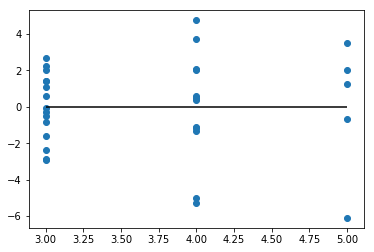

In [22]:

cars['gearsq']=cars['gear']**2

#straight to the payoffs: better fit and/or better residuals for that variable?
#old model for comparison:
print(carslm.summary())


y, X = dmatrices('mpg ~ drat+qsec+vs+am+gear+carb+gearsq', data=cars, return_type='dataframe')
carslm3=sm.OLS(y,X).fit()
print(carslm3.summary())

plt.scatter(cars['gear'], carslm.resid)
plt.hlines(0, xmin=min(cars['gear']), xmax=max(cars['gear']))

Again probably not worth.  What about a quick peek at our unused predictors?

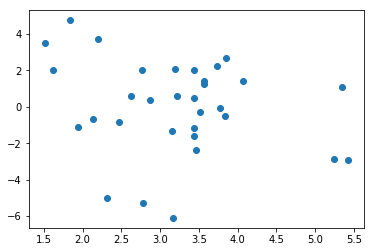

In [23]:
plt.scatter(cars['wt'], carslm.resid)
# plt.scatter(cars['cyl'], carslm.resid)
# plt.scatter(cars['disp'], carslm.resid)
# plt.scatter(cars['hp'], carslm.resid)

#Should all look fine!

### Wrapup!

We're done!  We did a model and we validated it.  We think that the default model after removing colinear predictors is probably our best

In [24]:
carslm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     18.64
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           3.99e-08
Time:                        16:06:48   Log-Likelihood:                -75.178
No. Observations:                  32   AIC:                             164.4
Df Residuals:                      25   BIC:                             174.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5965     11.520      0.052      0.959     -23.129      24.322
drat           2.1085      1.626      1.296      0.207      -1.241       5.458
qsec           0.4517      0.559      0.809      0.426      -0.699       1.602
vs             1.5001      1.990      0.754      0.458      -2.599       5.599
am             4.0671      2.039      1.994      0.057      -0.133       8.267
gear           1.7015      1.454      1.170      0.253      -1.293       4.696
carb          -1.6831      0.500     -3.367      0.002      -2.713      -0.654
==============================================================================
Omnibus:                        2.402   Durbin-Watson:                   2.163
Prob(Omnibus):                  0.301   Jarque-Bera (JB):                1.734
Skew:                          -0.570   Prob(JB):                        0.420
Kurtosis:                       2.994   Cond. No.                         433.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$MPG = .59+drat*2.1 + qsec*.45 + vs*1.5+am*4.06+gear*1.7+carb*(-1.6)$

Do these pass sanity checks?

A few do for sure!  But we're missing what might be more intuitive results.  Having that weight decreases milage is quite intuitive, but it terms out we threw out weight and kept a proxy for it.  Weight was positive correlated with cyl and disp, and negatively with drat.  Keeping drat out of all of those might have made our model harder to interpet!  If we'd kept weight instead, we'd have...

In [25]:
y, X = dmatrices('mpg ~ wt+qsec+vs+am+gear+carb+gearsq', data=cars, return_type='dataframe')
carslmwt=sm.OLS(y,X).fit()
carslmwt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     21.08
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           8.36e-09
Time:                        16:06:48   Log-Likelihood:                -70.906
No. Observations:                  32   AIC:                             157.8
Df Residuals:                      24   BIC:                             169.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3491     21.038      0.207      0.838     -39.071      47.769
wt            -3.0920      1.036     -2.984      0.006      -5.231      -0.953
qsec           0.8497      0.581      1.462      0.157      -0.350       2.050
vs            -0.1001      1.896     -0.053      0.958      -4.014       3.814
am             2.5761      2.027      1.271      0.216      -1.608       6.760
gear           5.2252     12.215      0.428      0.673     -19.986      30.437
carb          -0.7824      0.589     -1.328      0.197      -1.998       0.434
gearsq        -0.5343      1.484     -0.360      0.722      -3.598       2.529
==============================================================================
Omnibus:                        0.633   Durbin-Watson:                   1.756
Prob(Omnibus):                  0.729   Jarque-Bera (JB):                0.731
Skew:                           0.260   Prob(JB):                        0.694
Kurtosis:                       2.473   Cond. No.                     1.25e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

which is a model that ended up actually being much more predictive.  VIF doesn't always throw out the best of the colinear random variables: we should ask what we think makes the most sense to describe the problem, too.

And if we don't want to ask since it sounds arbitray, we could use a selection scheme instead.  Compare ALL the models:

- mpg~cyl
- mpg~disp
- mpg~hp
- mpg~drat
- mpg~wt)
- mpg~qsec
- mpg~vs
- mpg~am
- mpg~gear
- mpg~carb

and then add the one that represents the biggest jump in adjusted $R^2$.  We then naturally won't add any colinear predictors, since we've laready described that variable!

Both methods: VIF pre-selection and forward-stepping are perfectly valid.